# IO

In [1]:
import PineBioML. IO as IO

In [2]:
# Path
input_folder = "./input/"
output_folder = "./output/models/"
model_name = "example_basic MostInOne"

In [3]:
##### Read data method 1: read single file
##### index_col is the column of index of samples (or sample name).
##### If your data do not have such column, please set index_col=None
data = IO.read_file(input_folder+ "example_data.xlsx", index_col=0)

##### pick the target label column
y = data["y"]

##### drop the target from dataframe, using the remaining to predict y (the target)
x = data.drop("y", axis = 1)

In [4]:
##### Read data method 2: read multiple files
x, y = IO.read_multiple_groups(
    file_path_list=[
        input_folder+ "example_group1.csv", # all samples from this file will have y = 0, because it is in the 1st place of the file path list.
        input_folder+ "example_group2.tsv", # all samples from this file will have y = 1, because it is in the 2nd place of the file path list.
    ],
    index_col=0
    )

# Train test split

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, random_state=142, shuffle=True)

# Reload model

In [8]:
# load model
presaved_model = IO.load_model(output_folder, model_name)

In [9]:
presaved_model.predict(x_valid)

25    1.0
66    1.0
26    1.0
53    1.0
75    1.0
     ... 
0     1.0
52    1.0
17    0.0
13    1.0
79    0.0
Length: 66, dtype: float64


 
              precision    recall  f1-score   support

         0.0       0.67      0.55      0.60        33
         1.0       0.62      0.73      0.67        33

    accuracy                           0.64        66
   macro avg       0.64      0.64      0.63        66
weighted avg       0.64      0.64      0.63        66

sensitivity: 0.727
specificity: 0.545


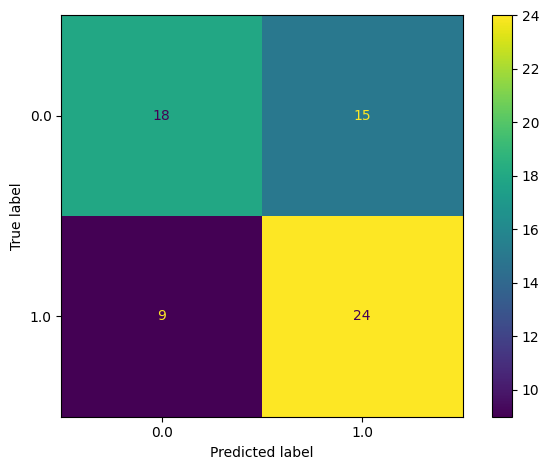

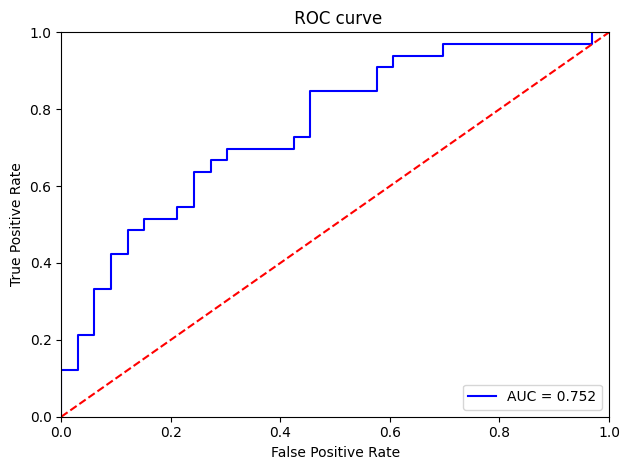

In [10]:
from PineBioML.report.utils import classification_summary

classification_summary(y_valid, presaved_model.predict_proba(x_valid)[:, 1]) 